In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import ensemble_project as ens

from sklearn.model_selection import train_test_split

from scipy.io import arff
import pandas as pd

In [3]:
data = arff.loadarff('C:/Users/Supervisor/Desktop/Kollektif Öğrenme/Proje/segment.arff')
df = pd.DataFrame(data[0])

df.head()

,region-centroid-col,region-centroid-row,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,class
0,0.857708,0.695833,0.333333,0.0,0.028517,0.000552,0.024845,0.000393,0.415700,0.382496,0.498527,0.359313,0.472014,0.627059,0.148008,0.498527,0.318996,0.168489,b'6'
1,0.442688,0.495833,0.000000,0.0,0.009506,0.000253,0.007453,0.000263,0.006197,0.000000,0.016937,0.000779,0.789179,0.184705,0.538899,0.016937,1.000000,0.154605,b'3'
2,0.794466,0.125000,0.000000,0.0,0.032320,0.000779,0.024845,0.000740,0.857735,0.816047,0.926363,0.823845,0.272389,0.663529,0.292220,0.926363,0.199347,0.124946,b'2'
3,0.122530,0.675000,0.000000,0.0,0.058935,0.001796,0.201242,0.004869,0.303900,0.288493,0.350515,0.268900,0.630597,0.427059,0.309297,0.350515,0.266914,0.175488,b'6'
4,0.237154,0.775000,0.000000,0.0,0.049430,0.001528,0.058385,0.001389,0.345728,0.322528,0.407953,0.301636,0.563433,0.511765,0.240986,0.407953,0.302925,0.171558,b'6'


In [4]:
X = df.drop(['class'],axis=1)
y = df['class']

In [5]:
y.groupby(y).count()

class
b'1'    330
b'2'    330
b'3'    330
b'4'    330
b'5'    330
b'6'    330
b'7'    330
Name: class, dtype: int64

In [6]:
y = y.apply(lambda x : 1 if x==b'1' else (2 if x==b'2' else (3 if x==b'3' else (4 if x==b'4' else (5 if x==b'5' else (6 if x==b'6' else 7))))))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
bagging_100vs10x10, eoe_bagging_100vs10x10, result_bagging_100vs10x10, ttest_bagging_vs_ens = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_bagging_100vs10x10)
print(ttest_bagging_vs_ens)

   bagging_acc   ens_acc
0     0.969697  0.967532
          t        p
0 -0.493865  0.64233


In [9]:
ada_100vs10x10, eoe_ada_100vs10x10, result_ada_100vs10x10, ttest_ada_vs_ens = ens.adaBoostClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_ada_100vs10x10)
print(ttest_ada_vs_ens)

    ada_acc   ens_acc
0  0.508658  0.508658
     t    p
0  0.0  1.0


In [10]:
rs_100vs10x10, eoe_rs_100vs10x10, result_rs_100vs10x10, ttest_rs_vs_ens = ens.randomSubspaceClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_rs_100vs10x10)
print(ttest_rs_vs_ens)

   rnd_subspace_acc   ens_acc
0          0.939394  0.967532
          t        p
0  0.532414  0.61724


In [11]:
rf_100vs10x10, eoe_rf_100vs10x10, result_rf_100vs10x10, ttest_rf_vs_ens = ens.randomForestClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_rf_100vs10x10)
print(ttest_rf_vs_ens)

     rf_acc   ens_acc
0  0.971861  0.974026
          t         p
0  2.247806  0.074482


In [12]:
extra_100vs10x10, eoe_extra_100vs10x10, result_extra_100vs10x10, ttest_extra_vs_ens = ens.extraTreesClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_extra_100vs10x10)
print(ttest_extra_vs_ens)

   extra_acc   ens_acc
0   0.967532  0.965368
          t         p
0  1.545335  0.182927


In [13]:
bagging_100vs10x100, eoe_bagging_100vs10x100, result_bagging_100vs10x100, ttest_bagging_vs_ens_100 = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_bagging_100vs10x100)
print(ttest_bagging_vs_ens_100)

   bagging_acc   ens_acc
0     0.965368  0.967532
          t         p
0 -0.307148  0.771112


In [14]:
ada_100vs10x100, eoe_ada_100vs10x100, result_ada_100vs10x100, ttest_ada_vs_ens_100 = ens.adaBoostClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_ada_100vs10x100)
print(ttest_ada_vs_ens_100)

    ada_acc   ens_acc
0  0.508658  0.508658
    t   p
0 NaN NaN


In [15]:
rs_100vs10x100, eoe_rs_100vs10x100, result_rs_100vs10x100, ttest_rs_vs_ens_100 = ens.randomSubspaceClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_rs_100vs10x100)
print(ttest_rs_vs_ens_100)

   rnd_subspace_acc   ens_acc
0          0.945887  0.971861
          t         p
0  0.820977  0.449017


In [16]:
rf_100vs10x100, eoe_rf_100vs10x100, result_rf_100vs10x100, ttest_rf_vs_ens_100 = ens.randomForestClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_rf_100vs10x100)
print(ttest_rf_vs_ens_100)

    rf_acc   ens_acc
0  0.97619  0.969697
          t         p
0 -0.442807  0.676406


In [17]:
extra_100vs10x100, eoe_extra_100vs10x100, result_extra_100vs10x100, ttest_extra_vs_ens_100 = ens.extraTreesClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_extra_100vs10x100)
print(ttest_extra_vs_ens_100)

   extra_acc   ens_acc
0   0.965368  0.974026
          t         p
0  1.159001  0.298795


In [18]:
all_df = ens.single_vote_stack(X_train, X_test, y_train, y_test)

In [19]:
all_df

,0,1
0,Bagging,0.959307
1,Adaboost,0.508658
2,RS,0.952814
3,RF,0.958874
4,ExtraRandomTree,0.959307
5,Voting,0.959307
6,Stack_Bagging,0.963203
7,Stack_Adaboost,0.381385
8,Stack_RS,0.961472
9,Stack_RF,0.964935


In [20]:
import matplotlib.pyplot as plt

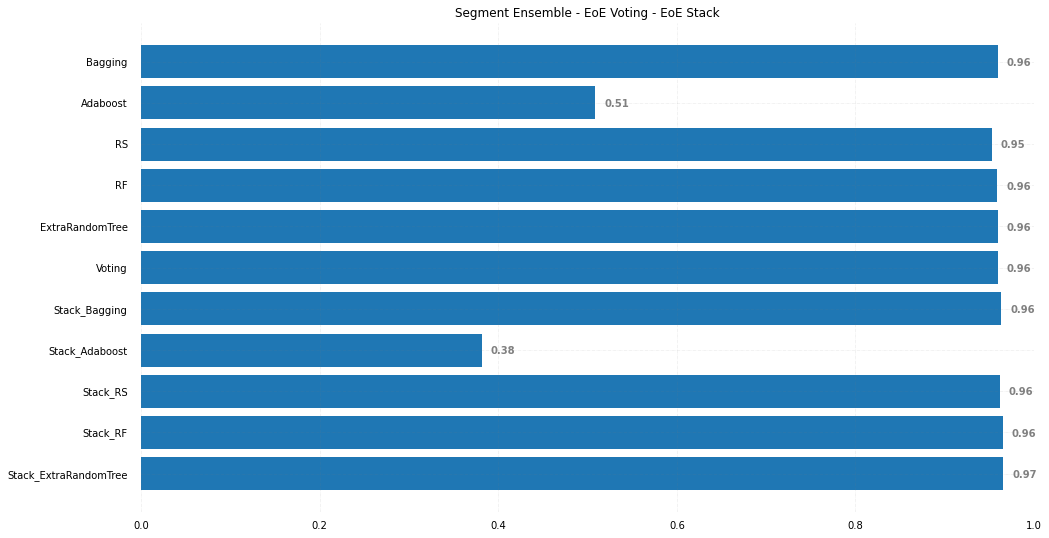

In [21]:
name = all_df[0]
acc = all_df[1]
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

ax.set_xlim(0,1)

# Horizontal Bar Plot
ax.barh(name, acc)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Segment Ensemble - EoE Voting - EoE Stack', loc ='center')
 

 
# Show Plot
plt.show()